In [1]:
import cmdstanpy
from cmdstanpy import CmdStanModel

In [2]:
%load_ext cmdstanjupyter

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

In [4]:
df=pd.read_csv("../Data/data-ss2.txt")
df.index=df["X"]

<AxesSubplot:xlabel='X'>

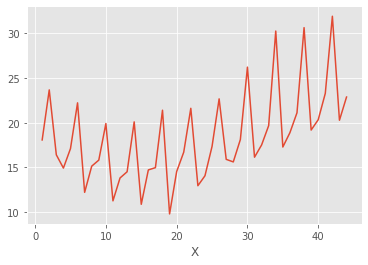

In [5]:
df["Y"].plot()

In [8]:
df

,X,Y
X,,
1,1,18.073
2,2,23.665
3,3,16.410
4,4,14.931
5,5,17.106
6,6,22.218
7,7,12.220
8,8,15.144
9,9,15.821


## 季節調整項を組み込んだモデル

In [7]:
%%stan state_space_model
data {
  int T;
  vector[T] Y;
}

parameters {
  vector[T] mu;
  vector[T] season;
  real<lower=0> s_mu;
  real<lower=0> s_season;
  real<lower=0> s_Y;
}

transformed parameters{
  vector[T] y_mean;
  vector[T-3] sum_part_season;
  y_mean = mu + season;
  for(t in 4:T)
    sum_part_season[t-3]=sum(season[(t-3):t]);
}

model{
  mu[2:T] ~ normal(mu[1:(T-1)],s_mu);
  sum_part_season ~ normal(0,s_season);
  Y ~ normal(y_mean,s_Y);
}

INFO:cmdstanjupyter:Writing model to .stan/state_space_model.stan
INFO:cmdstanjupyter:Creating CmdStanPy model & assigning it to variable "state_space_model"
INFO:cmdstanpy:compiling stan program, exe file: /home/takato/NoteBook/stan/pr_cmdstan/NoteBook/.stan/state_space_model
INFO:cmdstanpy:compiler options: stanc_options={}, cpp_options={}
INFO:cmdstanpy:compiled model file: /home/takato/NoteBook/stan/pr_cmdstan/NoteBook/.stan/state_space_model
INFO:cmdstanjupyter:StanModel now available as variable "state_space_model"!
 Compilation took 22 seconds.


In [9]:
data={"T":len(df),"Y":df["Y"].values}
fit=state_space_model.sample(data=data
                        ,seed=1234,iter_warmup=1000,iter_sampling=2000)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


In [10]:
fit.diagnose()

INFO:cmdstanpy:Processing csv files: /tmp/tmp55i7_zd0/state_space_model-202109262341-1-1oi0lgum.csv, /tmp/tmp55i7_zd0/state_space_model-202109262341-2-mn1jnzaq.csv, /tmp/tmp55i7_zd0/state_space_model-202109262341-3-l3dc6khc.csv, /tmp/tmp55i7_zd0/state_space_model-202109262341-4-wpg8ong9.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
4 of 8000 (0.05%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.091, is below the nominal threshold of 0.3 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size satisfactory.

Split R-hat values satisfac

"Processing csv files: /tmp/tmp55i7_zd0/state_space_model-202109262341-1-1oi0lgum.csv, /tmp/tmp55i7_zd0/state_space_model-202109262341-2-mn1jnzaq.csv, /tmp/tmp55i7_zd0/state_space_model-202109262341-3-l3dc6khc.csv, /tmp/tmp55i7_zd0/state_space_model-202109262341-4-wpg8ong9.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n4 of 8000 (0.05%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nThe E-BFMI, 0.091, is below the nominal threshold of 0.3 which suggests that HMC may have trouble exploring the target distribution.\nIf possible, try to reparameterize the model.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satis

In [12]:
dfres

,Mean,MCSE,StdDev,10%,25%,50%,75%,90%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,,,
lp__,28.057000,3.581800,31.32200,-5.80800,5.471300,21.343000,45.412000,73.13200,76.471,14.683,1.03830
mu[1],18.420000,0.006939,0.59680,17.66200,18.031000,18.431000,18.806000,19.18000,7397.900,1420.500,1.00080
mu[2],18.534000,0.010768,0.46810,17.94000,18.231000,18.541000,18.850000,19.13700,1889.900,362.890,1.00270
mu[3],18.502000,0.006929,0.46849,17.92600,18.198000,18.498000,18.804000,19.08400,4571.800,877.850,1.00030
mu[4],17.545000,0.005121,0.44354,16.98700,17.266000,17.552000,17.838000,18.10000,7502.900,1440.700,0.99985
...,...,...,...,...,...,...,...,...,...,...,...
sum_part_season[37],-0.070924,0.004943,0.45065,-0.64321,-0.359630,-0.073908,0.222460,0.48494,8312.100,1596.000,1.00020
sum_part_season[38],0.209040,0.007036,0.46118,-0.36407,-0.093647,0.195280,0.516410,0.79614,4295.800,824.840,1.00060
sum_part_season[39],-0.032876,0.010139,0.46731,-0.64160,-0.330190,-0.029160,0.269840,0.54858,2124.500,407.920,1.00240


In [13]:
dfres=fit.summary(percentiles=[10,25,50,75,90],sig_figs=5) #sig_figsで有効数字調整できる
mu_col=[f"mu[{i}]" for i in range(1,41+1)]
season_col=[f"season[{i}]" for i in range(1,41+1)]
pred_col=[f"y_mean[{i}]" for i in range(1,41+1)]
col=["10%","25%","50%","75%","90%"]
dfmu=dfres.loc[mu_col,col].reset_index()
dfseason=dfres.loc[season_col,col].reset_index()
dfy=dfres.loc[pred_col,col].reset_index()

In [18]:
dfy.index=np.arange(1,41+1)
dfy.head()

,name,10%,25%,50%,75%,90%
1,y_mean[1],17.673,17.917,18.089,18.270,18.551
2,y_mean[2],23.165,23.453,23.645,23.794,24.025
3,y_mean[3],15.485,15.930,16.259,16.433,16.575
4,y_mean[4],14.680,14.866,15.007,15.255,15.603
5,y_mean[5],16.682,16.940,17.105,17.277,17.527


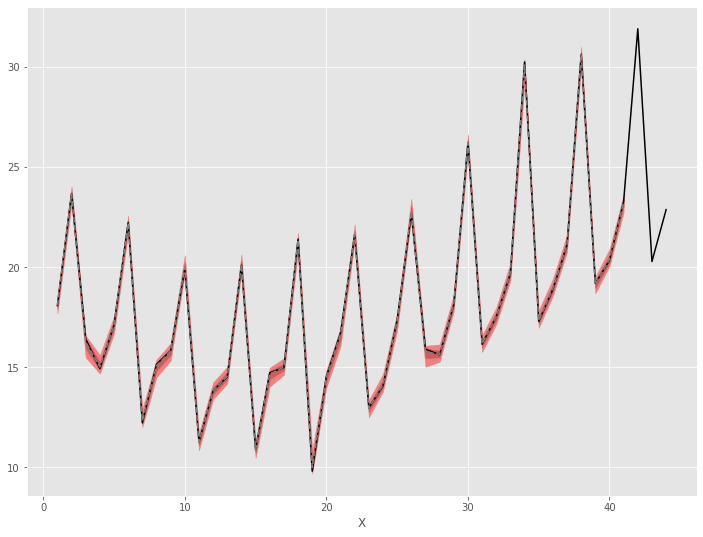

In [19]:
fig,ax=plt.subplots(figsize=(12,9))
df["Y"].plot(c="k")
dfy["50%"].plot(c="gray",ls="--")
ax.fill_between(dfy.index,dfy["10%"],dfy["90%"],interpolate=True,color="lightcoral")
ax.fill_between(dfy.index,dfy["25%"],dfy["75%"],interpolate=True,color="indianred")

In [20]:
dfall=fit.draws_pd()

<AxesSubplot:>

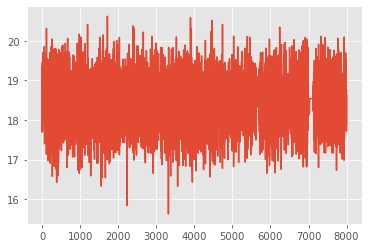

In [22]:
dfall["mu[1]"].plot()